In [1]:
# Block 1: Import Libraries

import pandas as pd
# Custom modules
from model import LogisticRegressionModel
from preprocess import load_and_preprocess, prepare_data, split_data, apply_smote
from utils import apply_min_max_scaling, make_plots,make_comparison_plots, compute_metrics, print_metrics, plot_confusion_matrix
from cross_val import kfoldcrossval, print_kfold_results


In [2]:
# Load dataset
data_file_path = './dataset/Heart Disease.csv'
data = load_and_preprocess(data_file_path)

# Display first few rows to understand the structure
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Prepare features and target column
features, target = prepare_data(data, target_column='HeartDisease')

# Display shapes of the features and target
print(f"Features Shape: {features.shape}")


Features Shape: (4238, 15)


In [4]:
# Split data (70% training, 15% validation, 15% testing)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(features, target)

# Display shapes of the split datasets
print(f"Training Set Shape: {X_train.shape}")
print(f"Validation Set Shape: {X_val.shape}")
print(f"Test Set Shape: {X_test.shape}")


Training Set Shape: (2966, 15)
Validation Set Shape: (636, 15)
Test Set Shape: (636, 15)


In [5]:
# Apply SMOTE to training set
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Display shapes of the resampled dataset
print(f"Resampled Training Set Shape: {X_train_smote.shape}")

Resampled Training Set Shape: (5020, 15)


In [6]:


# Initialize the logistic regression model
lr_model = LogisticRegressionModel(learning_rate=0.00001, epochs=30000)

# Train the model with original (unscaled) data
train_loss, val_acc, val_loss, train_acc = lr_model.train_batch_gradient_descent(
    X_train_smote, y_train_smote, X_val, y_val
)

Epoch 0: Train Loss = 0.6931471805599454, Train Accuracy = 0.5, Val Loss = 0.6931471805599454, Val Accuracy = 0.14150943396226415
Epoch 10000: Train Loss = 0.6493501723950976, Train Accuracy = 0.6157370517928287, Val Loss = 0.6732923672537122, Val Accuracy = 0.6147798742138365
Epoch 20000: Train Loss = 0.6473110395114235, Train Accuracy = 0.6189243027888446, Val Loss = 0.6718443635202763, Val Accuracy = 0.6132075471698113


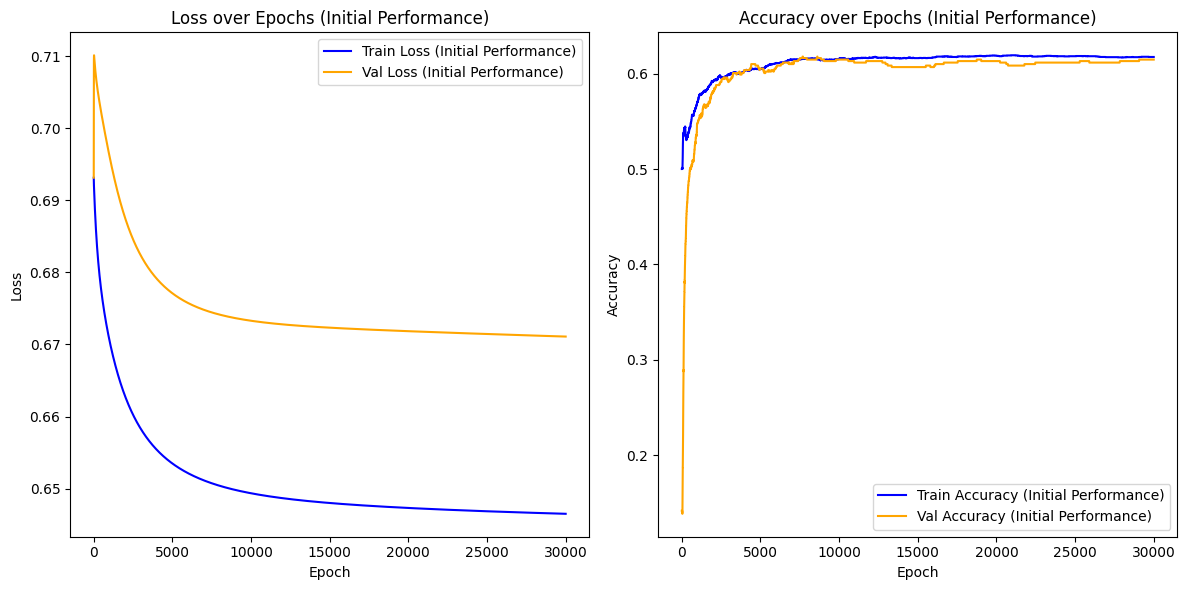

In [7]:
# # Display initial results
make_plots(train_loss, val_loss, train_acc, val_acc, "Initial Performance")

In [8]:

# Apply min-max scaling to training, validation, and test sets
X_train_scaled, X_val_scaled, X_test_scaled = apply_min_max_scaling(X_train_smote, X_val, X_test)

# Display scaled features
print("Scaled Features :")
pd.DataFrame(X_train_scaled).head()


Scaled Features :


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.0,0.263158,0.000000,1.0,0.150000,0.0,0.0,1.0,0.0,0.283531,0.243499,0.456522,0.161173,0.263158,0.118550
1,0.0,0.842105,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.302207,0.361702,0.423913,0.349733,0.210526,0.132768
2,0.0,0.184211,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.166384,0.096927,0.282609,0.121425,0.242105,0.118550
3,1.0,0.210526,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.205433,0.224586,0.347826,0.272176,0.200000,0.096045
4,0.0,0.210526,0.333333,1.0,0.333333,0.0,0.0,0.0,0.0,0.179966,0.219858,0.347826,0.107610,0.536842,0.101695


In [9]:

# Initialize the logistic regression model for scaled data
scaled_lr_model = LogisticRegressionModel(learning_rate=0.01, epochs=30000)

# Train the model with scaled data
train_loss_scaled, val_acc_scaled, val_loss_scaled, train_acc_scaled = scaled_lr_model.train_batch_gradient_descent(
    X_train_scaled, y_train_smote, X_val_scaled, y_val
)

Epoch 0: Train Loss = 0.6931471805599454, Train Accuracy = 0.5, Val Loss = 0.6931471805599454, Val Accuracy = 0.14150943396226415
Epoch 10000: Train Loss = 0.629343180978801, Train Accuracy = 0.6541832669322709, Val Loss = 0.6425610374731755, Val Accuracy = 0.639937106918239
Epoch 20000: Train Loss = 0.613497152581756, Train Accuracy = 0.6756972111553785, Val Loss = 0.6266551759144923, Val Accuracy = 0.6556603773584906


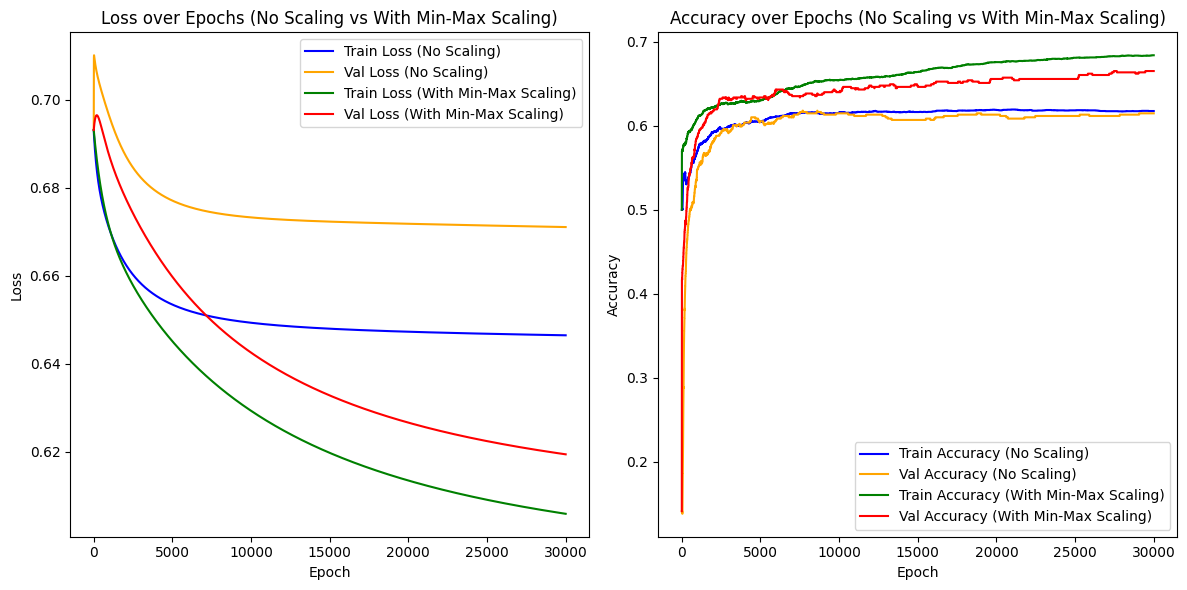

In [10]:
#Plot comparison plots
make_comparison_plots(train_losses1=train_loss, val_losses1=val_loss, train_accuracies1=train_acc, val_accuracies1=val_acc, method_name1="No Scaling", train_losses2=train_loss_scaled, 
                       val_losses2=val_loss_scaled, train_accuracies2=train_acc_scaled, val_accuracies2=val_acc_scaled, method_name2= "With Min-Max Scaling")

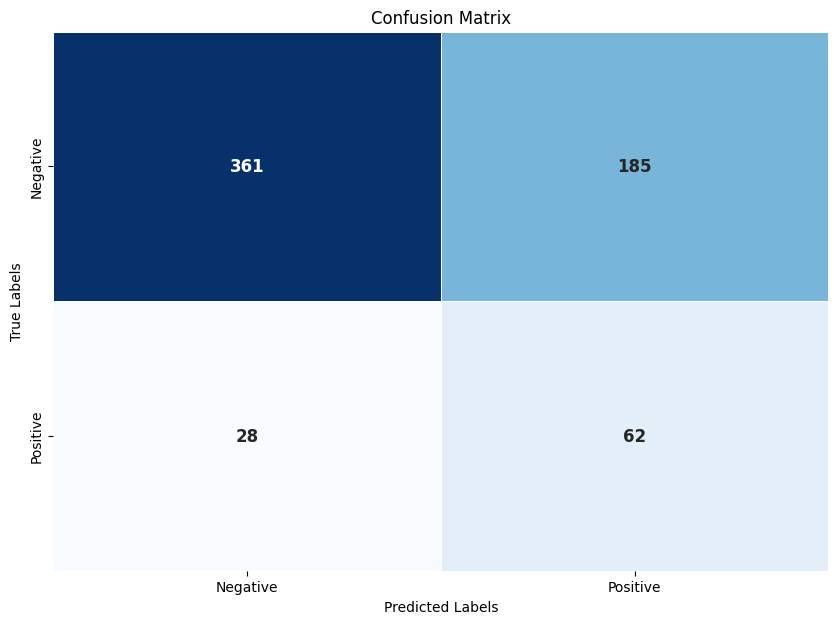

Confusion Matrix:
[[361 185]
 [ 28  62]]
Precision: 0.25101214574898784
Recall: 0.6888888888888889
F1 Score: 0.36795252225519287
ROC AUC: 0.675030525030525


In [11]:
y_val_pred = scaled_lr_model.predict(X_val_scaled)

# Compute metrics
conf_matrix, precision, recall, f1, roc_auc = compute_metrics(y_val, y_val_pred)

#plot confusion matrix
plot_confusion_matrix(conf_matrix)

# Print metrics
print_metrics(conf_matrix, precision, recall, f1, roc_auc)

In [12]:
# Train using Stochastic Gradient Descent
model_sgd = LogisticRegressionModel(learning_rate=0.001, epochs=900)
train_losses_sgd, val_accuracies_sgd, val_losses_sgd, train_accuracies_sgd= model_sgd.train_stochastic_gradient_descent(X_train_scaled, y_train_smote, X_val_scaled, y_val)

Epoch 0: Train Loss = 0.6789033802982263, Train Accuracy = 0.5934262948207172, Val Loss = 0.6930073181336217, Val Accuracy = 0.5455974842767296


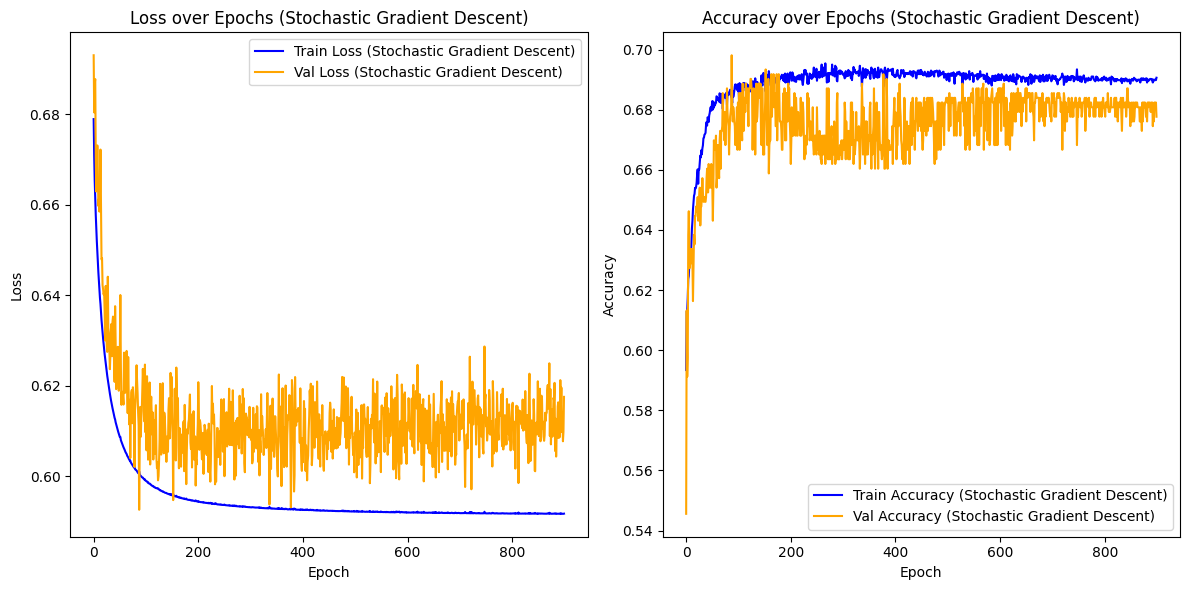

In [13]:
# Plot metrics for Stochastic Gradient Descent
make_plots(train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd, "Stochastic Gradient Descent")

In [14]:
# Train using Mini-Batch Gradient Descent with batch size 32
model_mini_batch_32 = LogisticRegressionModel(learning_rate=0.01, epochs=900)
train_losses_mini_batch_32, val_accuracies_mini_batch_32, val_losses_mini_batch_32, train_accuracies_mini_batch_32 = model_mini_batch_32.train_mini_batch_gradient_descent(
  X_train_scaled, y_train_smote, X_val_scaled, y_val, batch_size=32)

Epoch 0: Train Loss = 0.6876258770181476, Train Accuracy = 0.5784860557768924, Val Loss = 0.6964396722142782, Val Accuracy = 0.46226415094339623


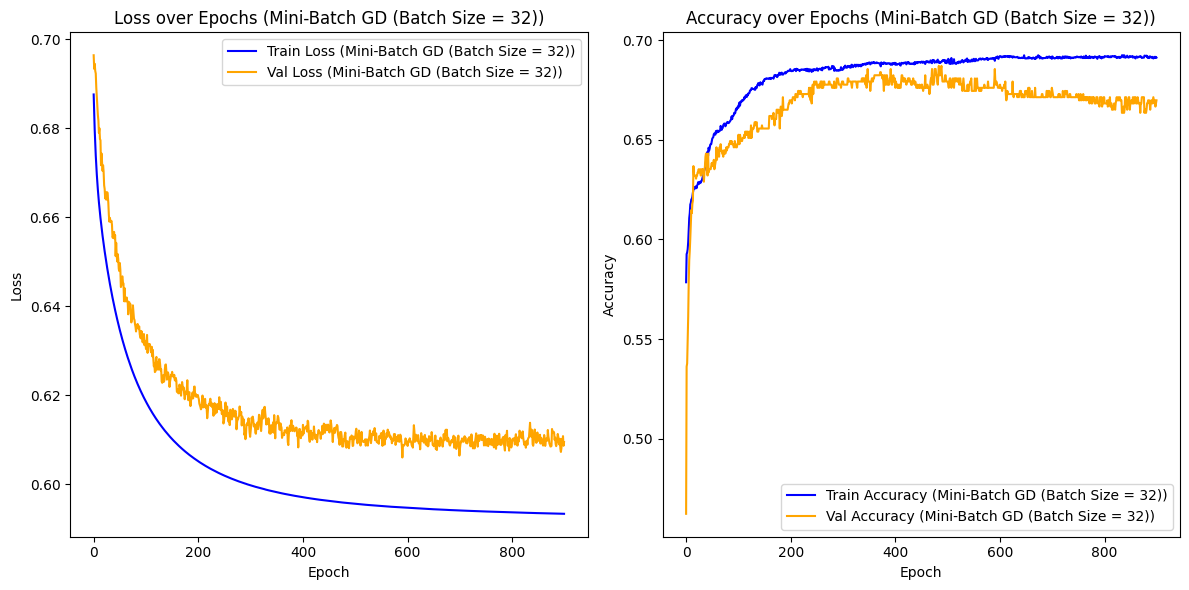

In [15]:
# Plot metrics for Mini-Batch Gradient Descent with batch size 32
make_plots(train_losses_mini_batch_32, val_losses_mini_batch_32, train_accuracies_mini_batch_32, val_accuracies_mini_batch_32, 'Mini-Batch GD (Batch Size = 32)')

In [16]:
model_mini_batch_64 = LogisticRegressionModel(learning_rate=0.01, epochs=900)
train_losses_mini_batch_64, val_accuracies_mini_batch_64, val_losses_mini_batch_64, train_accuracies_mini_batch_64 = model_mini_batch_64.train_mini_batch_gradient_descent(
  X_train_scaled, y_train_smote, X_val_scaled, y_val, batch_size=64)

Epoch 0: Train Loss = 0.6902038343248096, Train Accuracy = 0.5735059760956175, Val Loss = 0.6955887061125894, Val Accuracy = 0.4339622641509434


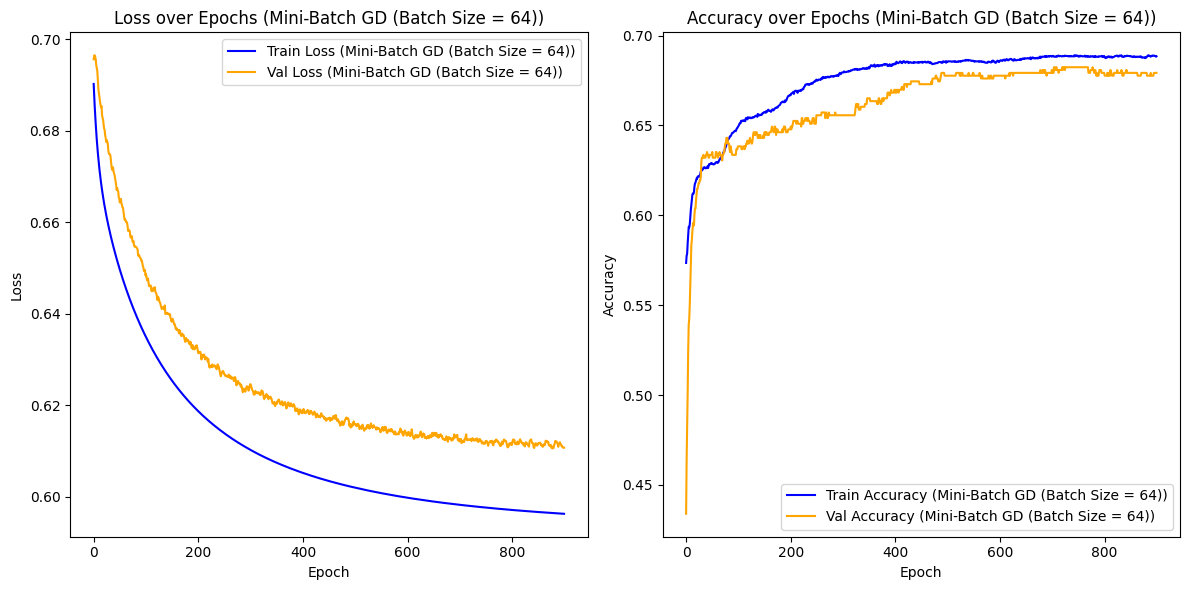

In [17]:
make_plots(train_losses_mini_batch_64, val_losses_mini_batch_64, train_accuracies_mini_batch_64, val_accuracies_mini_batch_64, 'Mini-Batch GD (Batch Size = 64)')

In [18]:
# K-Fold Cross Validation On initial data
accuracy_scores_initial, precision_scores_initial, recall_scores_initial, f1_scores_initial = kfoldcrossval(features, target, k=5, learning_rate=0.00001, epochs=30000)

# Print K-fold Cross-Validation Results
print_kfold_results(accuracy_scores_initial, precision_scores_initial, recall_scores_initial, f1_scores_initial, "K-Fold Cross Validation Results on initial data without resampling:")

Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.1542317900324388, Val Loss = 0.6931471805599454, Val Accuracy = 0.14285714285714285
Epoch 10000: Train Loss = 0.4174439932133298, Train Accuracy = 0.8457682099675612, Val Loss = 0.41375534298723665, Val Accuracy = 0.8571428571428571
Epoch 20000: Train Loss = 0.4147710835754329, Train Accuracy = 0.8481273960483633, Val Loss = 0.4151401143606841, Val Accuracy = 0.8571428571428571
Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.15157770569153642, Val Loss = 0.6931471805599454, Val Accuracy = 0.15348288075560804
Epoch 10000: Train Loss = 0.4188168927295272, Train Accuracy = 0.8490120908286641, Val Loss = 0.4117407894957848, Val Accuracy = 0.846517119244392
Epoch 20000: Train Loss = 0.4164093150457833, Train Accuracy = 0.8501916838690652, Val Loss = 0.4090772062671167, Val Accuracy = 0.8453364817001181
Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.15039811265113537, Val Loss = 0.6931471805599454, Val Ac

In [19]:
# K-Fold Cross Validation On resampled data
accuracy_scores_resampled, precision_scores_resampled, recall_scores_resampled, f1_scores_resampled = kfoldcrossval(features, target, k=5, learning_rate=0.00001, epochs=30000)

# Print K-fold Cross-Validation Results
print_kfold_results(accuracy_scores_resampled, precision_scores_resampled, recall_scores_resampled, f1_scores_resampled, "K-Fold Cross Validation Results on resampled data:")

Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.15482158655263933, Val Loss = 0.6931471805599454, Val Accuracy = 0.14049586776859505
Epoch 10000: Train Loss = 0.4206391018173219, Train Accuracy = 0.8451784134473607, Val Loss = 0.40509368927221584, Val Accuracy = 0.8583234946871311
Epoch 20000: Train Loss = 0.41839425406064923, Train Accuracy = 0.8463580064877617, Val Loss = 0.4025664065788584, Val Accuracy = 0.8583234946871311
Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.1501032143910351, Val Loss = 0.6931471805599454, Val Accuracy = 0.15938606847697756
Epoch 10000: Train Loss = 0.4151945943776479, Train Accuracy = 0.8501916838690652, Val Loss = 0.42534889524026925, Val Accuracy = 0.8406139315230224
Epoch 20000: Train Loss = 0.412830130130795, Train Accuracy = 0.8496018873488647, Val Loss = 0.42323979368136516, Val Accuracy = 0.8441558441558441
Epoch 0: Train Loss = 0.6931471805599453, Train Accuracy = 0.15069301091123563, Val Loss = 0.6931471805599454, Val

Early stopping at epoch 616


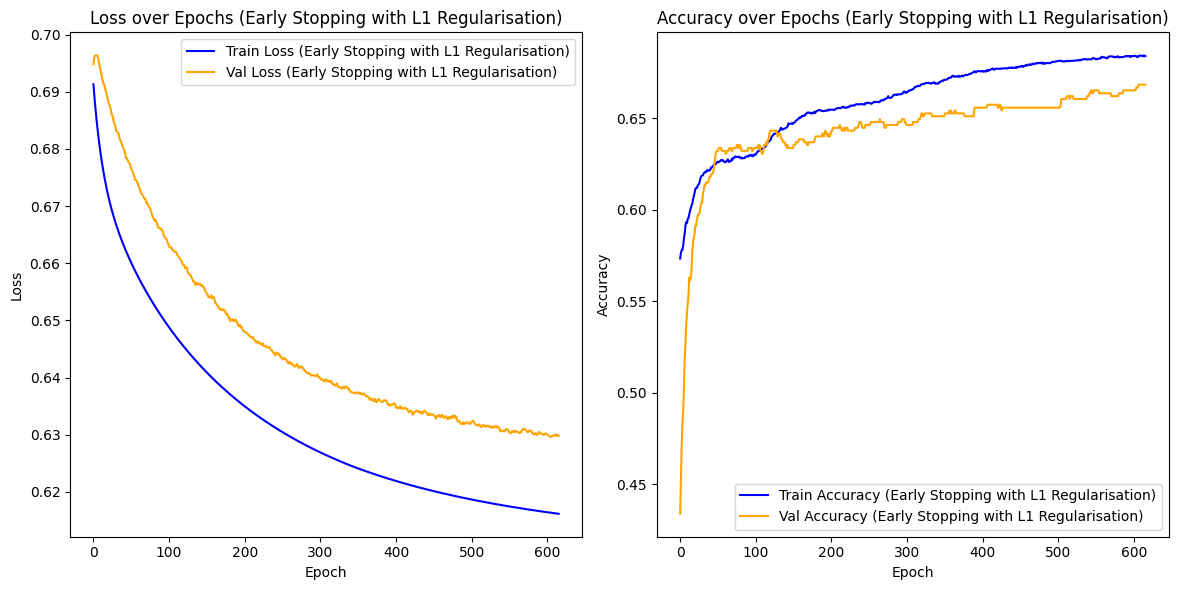

In [20]:
#Performing Early Stopping wirh L1 Regularisation
early_stopping_model = LogisticRegressionModel(learning_rate=0.0001, epochs=30000)
train_loss_early_stopping_l1, val_loss_early_stopping_l1, train_acc_early_stopping_l1, val_acc_early_stopping_l1 = early_stopping_model.train_stochastic_gradient_descent_with_early_stopping(
    X_train_scaled, y_train_smote, X_val_scaled, y_val, iter_without_improvement=200, alpha=0.001, regulariser="l1")

make_plots(train_loss_early_stopping_l1, val_loss_early_stopping_l1, train_acc_early_stopping_l1, val_acc_early_stopping_l1, "Early Stopping with L1 Regularisation")

Early stopping at epoch 425


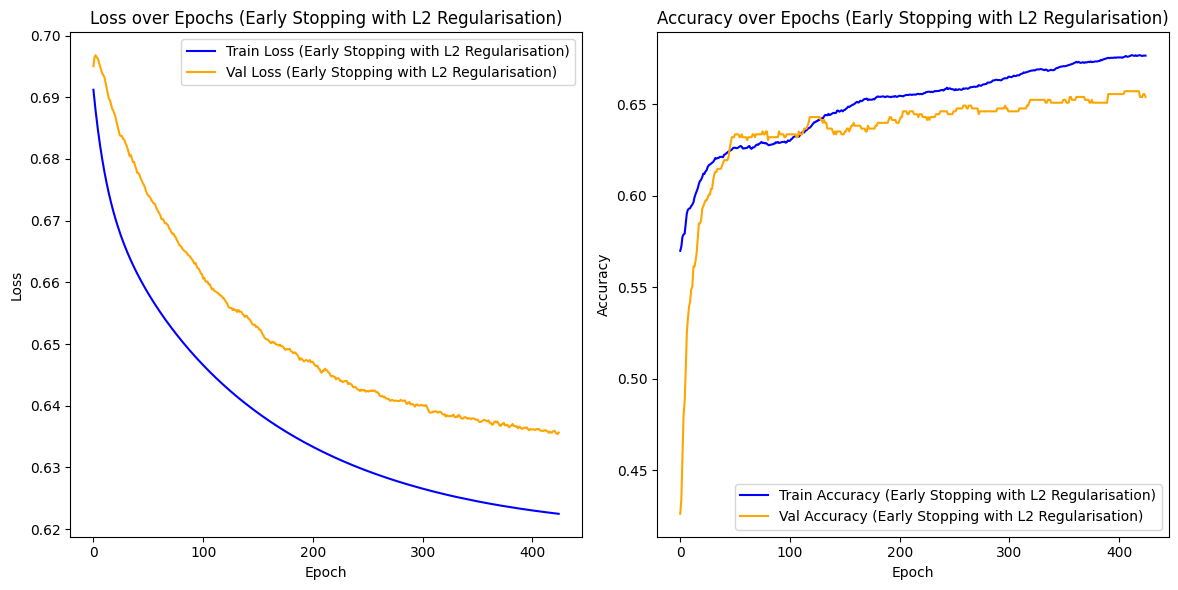

In [21]:
#Performing Early Stopping wirh L2 Regularisation
early_stopping_model = LogisticRegressionModel(learning_rate=0.0001, epochs=30000)

train_loss_stopping_l2, val_loss_stopping_l2, train_acc_stopping_l2, val_acc_stopping_l2 = early_stopping_model.train_stochastic_gradient_descent_with_early_stopping(
    X_train_scaled, y_train_smote, X_val_scaled, y_val, iter_without_improvement=200, alpha=0.001, regulariser="l2")

make_plots(train_loss_stopping_l2, val_loss_stopping_l2, train_acc_stopping_l2, val_acc_stopping_l2, "Early Stopping with L2 Regularisation")

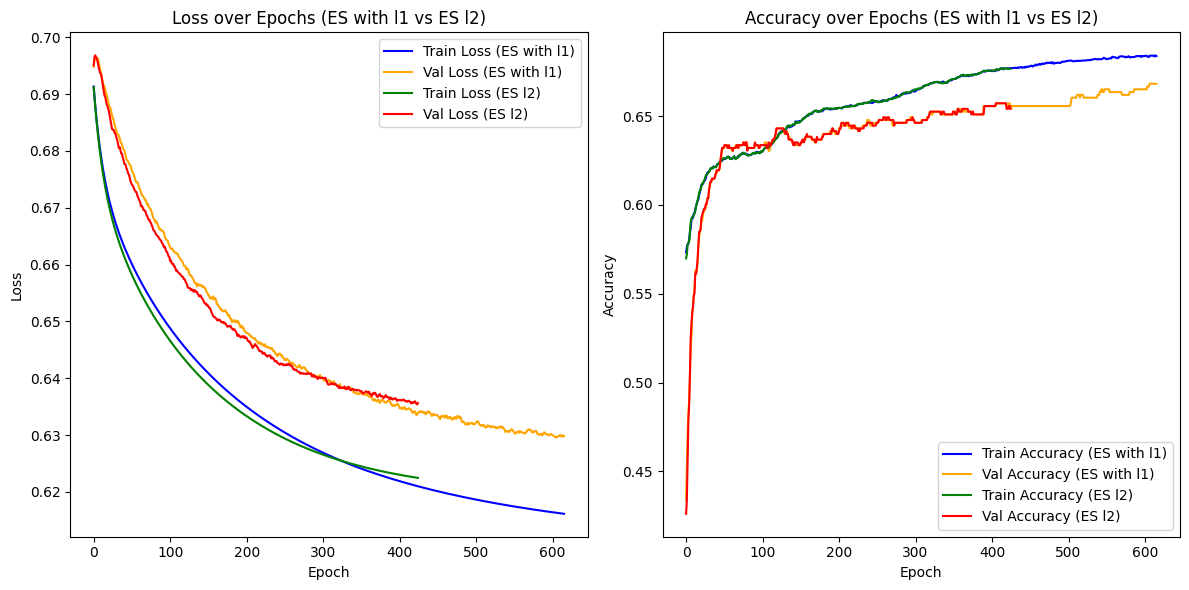

In [22]:
make_comparison_plots(train_losses1=train_loss_early_stopping_l1, val_losses1=val_loss_early_stopping_l1, train_accuracies1=train_acc_early_stopping_l1, val_accuracies1=val_acc_early_stopping_l1, method_name1="ES with l1", 
                      train_losses2=train_loss_stopping_l2,val_losses2=val_loss_stopping_l2, train_accuracies2=train_acc_stopping_l2, val_accuracies2=val_acc_stopping_l2, method_name2="ES l2")